DynapSE F-I curve example

In [1]:
from brian2 import *

import sys 
sys.path.append('..')
from DynapSE import DynapSE
from equations.dynapse_eq import *
from parameters.dynapse_param import *

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

The ordinary differential equations defining neuron and synapse models should be accessible by Brian2. Let's import the model equations and their parameters.

In [2]:
mpl.rcParams['figure.dpi'] = 90

# C++ code generation for faster spiking network simulation
set_device('cpp_standalone')
# Ignore Brian2 base warnings
BrianLogger.suppress_name('base')
# The clock of Brian2 simulation for numerically solve ODEs
defaultclock.dt = 20 * us

In [3]:
# to start a new build to run multiple full simulations
device.reinit()
device.activate()
# reset the defaultclock after activate
defaultclock.dt = 20 * us

In [4]:
# Instantiate a Brian2 network
network = Network()
chip = DynapSE(network)
seed(4321)

# Allocate single DPI neuron from Core 1
DPI_neuron = chip.get_neurons(1, 'Core_1')


DPI_neuron.Isoma_ahp_w = 2 * pA
DPI_neuron.Isoma_ahp_tau = 1 * pA
DPI_neuron.Isoma_const = 0.35 * nA

mon_neuron_state = StateMonitor(DPI_neuron, 'Isoma_mem', record=True)
mon_ahp_state = StateMonitor(DPI_neuron, 'Isoma_ahp', record=True)

# Add every instance we created to Brian network, so it will include them in the simulation

network.add([DPI_neuron, mon_neuron_state, mon_ahp_state])

# Simulation
network.run(1000 * ms)


1 neurons are allocated from Core_1.


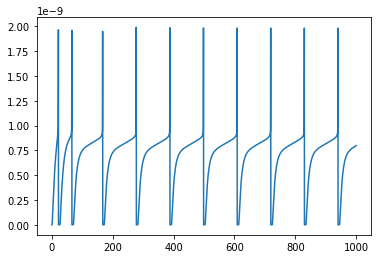

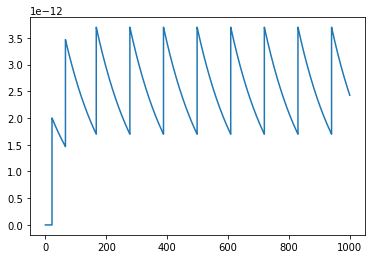

In [5]:

Isoma_mem = mon_neuron_state.Isoma_mem[0]
plt.figure()

plt.plot(mon_neuron_state.t/ms, Isoma_mem)
plt.show()

Isoma_ahp = mon_ahp_state.Isoma_ahp[0]
plt.figure()

plt.plot(mon_ahp_state.t/ms, Isoma_ahp)
plt.show()
